In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [2]:
event = pd.read_csv("../../data/introduction2DS/heart-disease.csv")

In [3]:
event.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
y = event.target
x = event.drop('target', axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
from sklearn.model_selection import train_test_split

In [8]:
import numpy as np

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
# rf = RandomForestClassifier(n_estimators = 15, max_depth = 5)
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)

<AxesSubplot:>

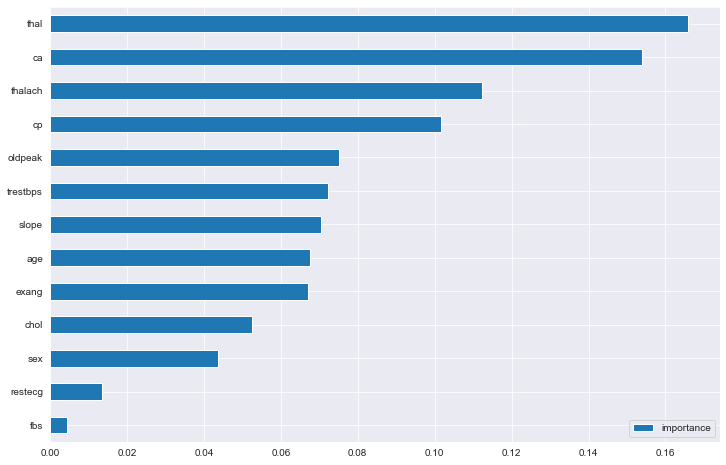

In [15]:
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [16]:
mushroom = pd.read_csv('../../data/introduction2DS/training_mush.csv')

In [17]:
mushroom.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [21]:
y = mushroom['class']
x = mushroom.drop('class', axis=1)

In [22]:
from sklearn.model_selection import  GridSearchCV

In [23]:
clf = RandomForestClassifier(random_state=0)

In [30]:
params = {'n_estimators':range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf':range(1, 8), 'min_samples_split':range(2, 10, 2)}

In [31]:
rf = GridSearchCV(clf, param_grid=params, cv=3)

In [32]:
rf.fit(x, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [33]:
rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [39]:
test_mush = pd.read_csv('../../data/introduction2DS/testing_mush.csv')

In [40]:
test_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [49]:
y_pred = rf.predict(test_mush)

In [50]:
y_pred.sum()

976

In [46]:
y_true = pd.read_csv('../../data/introduction2DS/testing_y_mush.csv')

<AxesSubplot:>

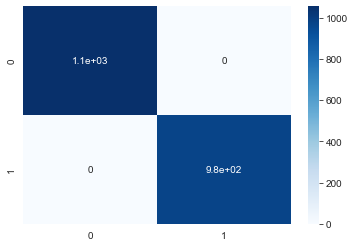

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")
